In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.layers import Dense, Dropout, Flatten,Conv1D, Conv2D, MaxPooling2D,Activation
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.initializers import glorot_normal

Using TensorFlow backend.


In [3]:
X = np.loadtxt('FinalX')
X2 = X.reshape(1440,20,100,1)
y = np.loadtxt('FinalY')

In [4]:
train_test = train_test_split(X2, y, test_size= 0.34, random_state=42, shuffle=True)

In [5]:
X_train, X_test, y_train, y_test = train_test
X_train = X_train.reshape(X_train.shape[0], 20, 100, 1)
X_test = X_test.reshape(X_test.shape[0], 20, 100, 1)
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [13]:
model = Sequential()

model.add(Conv2D(20,(5,5),kernel_initializer = 'glorot_normal',padding = 'same',input_shape = (20,100,1),activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(20,(5,5),kernel_initializer = 'glorot_normal',padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides = (2, 2)))

model.add(Conv2D(40,(5,5),kernel_initializer = 'glorot_normal',padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(40,(5,5),kernel_initializer = 'glorot_normal',padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = (2, 2)))

model.add(Conv2D(80,(5,5),kernel_initializer = 'glorot_normal',padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(80,(5,5),kernel_initializer = 'glorot_normal',padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides = (2, 2)))

model.add(Flatten())
model.add(Dense(3072,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8,activation='softmax'))

In [14]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 20, 100, 20)       520       
_________________________________________________________________
batch_normalization_21 (Batc (None, 20, 100, 20)       80        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 20, 100, 20)       10020     
_________________________________________________________________
batch_normalization_22 (Batc (None, 20, 100, 20)       80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 50, 20)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 50, 40)        20040     
_________________________________________________________________
batch_normalization_23 (Batc (None, 10, 50, 40)        160       
__________

In [16]:
history = model.fit(X_train, y_train_hot, batch_size= 200, epochs=30, verbose=1,callbacks = [reduce_lr] , validation_data=(X_test, y_test_hot))

Train on 950 samples, validate on 490 samples
Epoch 1/30
950/950 [==============================] - 6s 7ms/step - loss: 5.1882 - acc: 0.1916 - val_loss: 9.0596 - val_acc: 0.1551
Epoch 2/30
950/950 [==============================] - 2s 2ms/step - loss: 3.9216 - acc: 0.3095 - val_loss: 10.0931 - val_acc: 0.2102
Epoch 3/30
950/950 [==============================] - 2s 2ms/step - loss: 3.4552 - acc: 0.3853 - val_loss: 9.0284 - val_acc: 0.2082
Epoch 4/30
950/950 [==============================] - 2s 2ms/step - loss: 1.3952 - acc: 0.6516 - val_loss: 3.8396 - val_acc: 0.2816
Epoch 5/30
950/950 [==============================] - 2s 2ms/step - loss: 0.3633 - acc: 0.8789 - val_loss: 2.1862 - val_acc: 0.4102
Epoch 6/30
950/950 [==============================] - 2s 2ms/step - loss: 0.0433 - acc: 0.9947 - val_loss: 1.8373 - val_acc: 0.4510
Epoch 7/30
950/950 [==============================] - 2s 2ms/step - loss: 0.0100 - acc: 1.0000 - val_loss: 1.7875 - val_acc: 0.4551
Epoch 8/30
950/950 [=========

In [38]:
model.save_weights('speech_emo_weights2.h5')

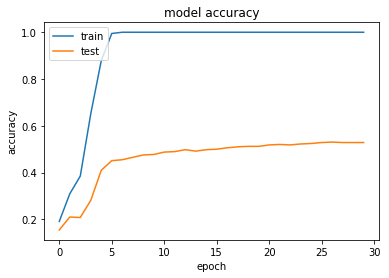

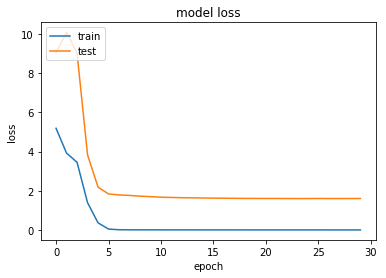

In [17]:
plt.plot()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [18]:
score = model.evaluate(X_test, y_test_hot, verbose=1)

490/490 [==============================] - 1s 1ms/step


In [19]:
score

[2.2852132826435323, 0.5306122450196014]